In [1]:


import os


In [2]:

d = '../Logs/'
daily_folders = sorted([os.path.join(d, o) for o in os.listdir(d) 
                    if os.path.isdir(os.path.join(d,o))])

daily_folders

['../Logs/17-08-02',
 '../Logs/17-08-03',
 '../Logs/17-08-04',
 '../Logs/17-08-11',
 '../Logs/17-08-13',
 '../Logs/17-08-14',
 '../Logs/17-08-15',
 '../Logs/17-08-16',
 '../Logs/17-08-17',
 '../Logs/17-08-18',
 '../Logs/17-08-19',
 '../Logs/17-08-20',
 '../Logs/17-08-21',
 '../Logs/17-08-22',
 '../Logs/17-08-23',
 '../Logs/17-08-24',
 '../Logs/17-08-25',
 '../Logs/17-08-26',
 '../Logs/17-08-27',
 '../Logs/17-08-28',
 '../Logs/17-08-29',
 '../Logs/17-08-30',
 '../Logs/17-08-31',
 '../Logs/17-09-01',
 '../Logs/17-09-02',
 '../Logs/17-09-03',
 '../Logs/17-09-04',
 '../Logs/17-09-05',
 '../Logs/17-09-06',
 '../Logs/17-09-07',
 '../Logs/17-09-08',
 '../Logs/17-09-09',
 '../Logs/17-09-10',
 '../Logs/17-09-11',
 '../Logs/17-09-12',
 '../Logs/17-09-13',
 '../Logs/17-09-14',
 '../Logs/17-09-15',
 '../Logs/17-09-16',
 '../Logs/17-09-17',
 '../Logs/17-09-18',
 '../Logs/17-09-19',
 '../Logs/17-09-20',
 '../Logs/17-09-21',
 '../Logs/17-09-22',
 '../Logs/17-09-23',
 '../Logs/17-09-24',
 '../Logs/17-

In [3]:
#only one file in the folders

ch6_files = sorted([os.path.join(f,o) for f in daily_folders
                   for o in os.listdir(f) 
                   if o.startswith('CH6 T')])
ch6_files

['../Logs/17-08-02/CH6 T 17-08-02.log',
 '../Logs/17-08-03/CH6 T 17-08-03.log',
 '../Logs/17-08-04/CH6 T 17-08-04.log',
 '../Logs/17-08-11/CH6 T 17-08-11.log',
 '../Logs/17-08-13/CH6 T 17-08-13.log',
 '../Logs/17-08-14/CH6 T 17-08-14.log',
 '../Logs/17-08-15/CH6 T 17-08-15.log',
 '../Logs/17-08-16/CH6 T 17-08-16.log',
 '../Logs/17-08-17/CH6 T 17-08-17.log',
 '../Logs/17-08-18/CH6 T 17-08-18.log',
 '../Logs/17-08-19/CH6 T 17-08-19.log',
 '../Logs/17-08-20/CH6 T 17-08-20.log',
 '../Logs/17-08-21/CH6 T 17-08-21.log',
 '../Logs/17-08-22/CH6 T 17-08-22.log',
 '../Logs/17-08-23/CH6 T 17-08-23.log',
 '../Logs/17-08-24/CH6 T 17-08-24.log',
 '../Logs/17-08-25/CH6 T 17-08-25.log',
 '../Logs/17-08-26/CH6 T 17-08-26.log',
 '../Logs/17-08-27/CH6 T 17-08-27.log',
 '../Logs/17-08-28/CH6 T 17-08-28.log',
 '../Logs/17-08-29/CH6 T 17-08-29.log',
 '../Logs/17-08-30/CH6 T 17-08-30.log',
 '../Logs/17-08-31/CH6 T 17-08-31.log',
 '../Logs/17-09-01/CH6 T 17-09-01.log',
 '../Logs/17-09-02/CH6 T 17-09-02.log',


In [4]:
import datetime, time
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dates,Ts = [],[]

for f in ch6_files:
    print('.',end='')
    with open(f,'r') as fi:
        for line in fi.readlines():
            parts = line.split(',')
            if len(parts) == 3:
                #parser.parse(  )
                #datetime.datetime.fromisoformat( )
                dates.append( datetime.datetime.strptime(parts[0][1:] + 'T' + parts[1],"%d-%m-%yT%H:%M:%S") )
                
                Ts.append(float(parts[2]))

.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

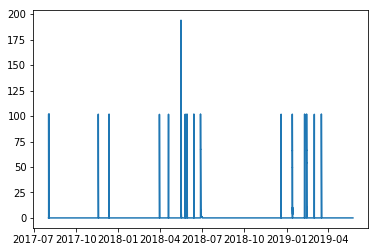

In [6]:
plt.plot_date(dates,Ts,'-')

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.DataFrame({'dt':dates,'T':Ts})

In [9]:
df['epoch'] = df['dt'].apply(lambda x: x.timestamp() )
min_t = np.min(df['epoch'])
df['h'] = (df['epoch']-min_t)/3600

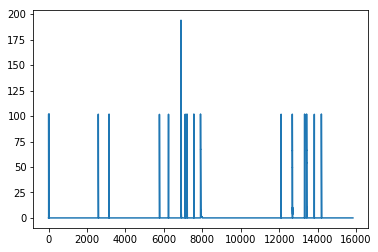

In [10]:

plt.plot(df['h'],df['T'])

In [11]:
import json

In [12]:
def save_json(filename,obj):
    with open(filename,'w+') as f:
        json.dump(obj,f)

/home/sarsby/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


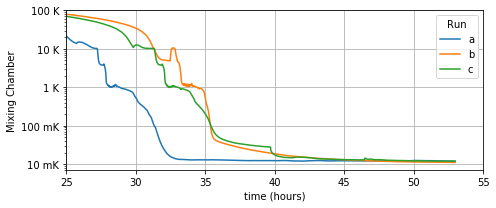

In [19]:
#starts = [4890,5855,6269,7398,8298]

starts = [2570,5748,7183]
plt.figure(figsize=(7,3),)
runsletters = ['a','b','c']
r = {}
for start,label in zip(starts,runsletters):
    length = 55
    offset = 25
    tdf=df[df['h'] > start+offset]
    tdf=tdf[tdf['h'] < start-2+length]
    newmin= np.min(tdf['h'])-offset
    r[label] = {
        'h': list(tdf['h']-newmin),
        'T': list(tdf['T']),
    }
    plt.semilogy(tdf['h']-newmin,tdf['T'],label=label)

save_json('./50tobasekelvinlamb.json',r)
plt.legend(title='Run')
plt.yscale('log')
plt.xlabel('time (hours)')
plt.ylabel('Mixing Chamber')
plt.xticks(range(offset,length+1,5))
plt.grid(True)
plt.ylim(0,80)
plt.xlim(offset,length)
plt.yticks([0.01,0.1,1,10,100],['10 mK','100 mK','1 K','10 K','100 K'])
plt.tight_layout()

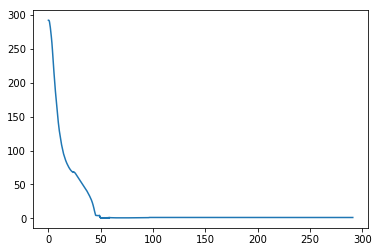

In [132]:
start = 8298
length = 1000
tdf=df[df['h'] > start]
tdf=tdf[tdf['h'] < start+length]
newmin= np.min(tdf['h'])

plt.plot(tdf['h']-newmin,tdf['T'])